<a href="https://www.kaggle.com/code/arseniykg1/notebook6116e1e562?scriptVersionId=223438148" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [29]:
import pandas as pd
import lightgbm as lgb

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [30]:
df = pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv')
df.drop(columns="Order",inplace=True)
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [31]:
y= df["SalePrice"]
X= df.drop(columns="SalePrice")

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)


In [32]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

In [33]:
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )


In [34]:
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value= -1))
           ])# об'єднання двох pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)
 

In [35]:
preprocessor.set_output(transform="pandas")
preprocessor.fit(X_train)
X_train_prep= preprocessor.transform(X_train)
X_test_prep= preprocessor.transform(X_test)
X_test_prep.head()

,num__PID,num__MS SubClass,num__Lot Frontage,num__Lot Area,num__Overall Qual,num__Overall Cond,num__Year Built,num__Year Remod/Add,num__Mas Vnr Area,num__BsmtFin SF 1,...,cat__Garage Type,cat__Garage Finish,cat__Garage Qual,cat__Garage Cond,cat__Paved Drive,cat__Pool QC,cat__Fence,cat__Misc Feature,cat__Sale Type,cat__Sale Condition
1357,903427090.0,70.0,68.0,5100.0,8.0,7.0,1925.0,1996.0,0.0,0.0,...,5.0,2.0,4.0,4.0,2.0,0.0,2.0,3.0,9.0,4.0
2367,527450460.0,160.0,21.0,1890.0,6.0,7.0,1972.0,1972.0,380.0,282.0,...,5.0,2.0,4.0,4.0,2.0,0.0,2.0,3.0,9.0,4.0
2822,908128100.0,60.0,62.0,7162.0,7.0,5.0,2003.0,2004.0,190.0,0.0,...,3.0,0.0,4.0,4.0,2.0,0.0,2.0,3.0,9.0,4.0
2126,907135180.0,20.0,60.0,8070.0,4.0,5.0,1994.0,1995.0,0.0,588.0,...,1.0,2.0,4.0,4.0,2.0,0.0,2.0,3.0,9.0,4.0
1544,910200080.0,30.0,50.0,7000.0,6.0,8.0,1926.0,1998.0,0.0,299.0,...,5.0,2.0,4.0,4.0,1.0,0.0,2.0,3.0,9.0,4.0


In [36]:
model= lgb.LGBMRegressor(objective="rmse")

In [42]:
model.fit(X_train_prep, y_train, 
         eval_set=[(X_train_prep, y_train),(X_test_prep, y_test)],
          eval_names= ["X_train","X_test"],
          eval_metric= ["mse", "mae"])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3909
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 74
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 178582.207765


LGBMRegressor(objective='rmse')

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

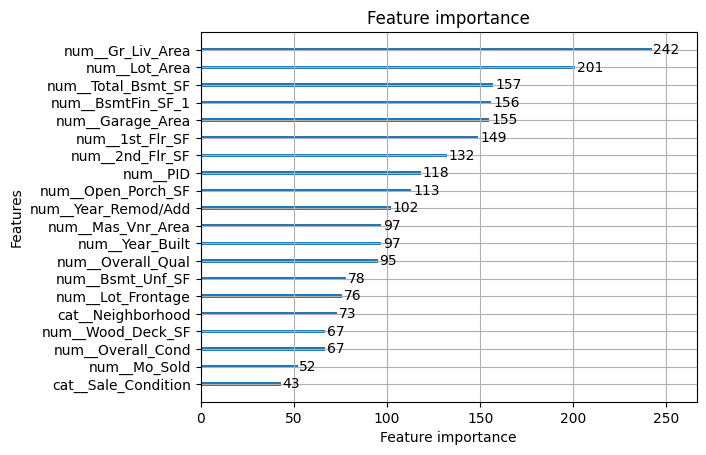

In [43]:
lgb.plot_importance(model, max_num_features=20)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

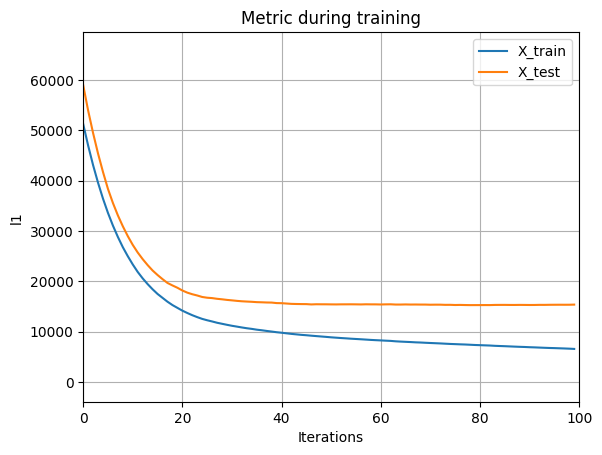

In [46]:
lgb.plot_metric(model, metric="l1")